In [1]:
from PIL import Image
import numpy as np

In [3]:
def resize_crop(img, h, w):
    """
    Scaling, centering and cropping the image 
    to the specified size (w, h)
    """
    img_w, img_h = img.size
    ratio = img_w / img_h
    if ratio > (w / h):
        new_w = int(h * ratio)
        img = img.resize((new_w, h))
        crop_x = round(new_w / 2 - w / 2)
        img = img.crop((crop_x, 0, crop_x + w, h))
    else:
        new_h = int(w / ratio)
        img = img.resize((w, new_h))
        crop_y = round(new_h / 2 - h / 2)
        img = img.crop((0, crop_y, w, crop_y + h))
    return img

In [4]:
img1 = Image.open('images/frog.png')
img2 = Image.open('images/secret.jpg')
img2 = resize_crop(img2, *img1.size[::-1])

In [60]:
def t2(num):
    print(f'{num:>3} = {bin(num)[2:]:>08}')

In [104]:
t2(7 << 1)

 14 = 00001110


In [70]:
n = 156
b = 4
t2(n)
t2(n >> b << b)
t2(n >> (8 - b))
u = (n >> b << b) + (n >> (8 - b)) # united
t2(u)
t2(u - (u >> b << b))

156 = 10011100
144 = 10010000
  9 = 00001001
153 = 10011001
  9 = 00001001


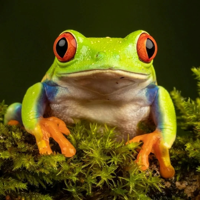

In [47]:
visibility = 1

img1_np = np.array(img1)
img2_np = np.array(img2)

img1_np = img1_np >> visibility << visibility
# img2_np = img2_np - (img2_np >> visibility << visibility)
img2_np = img2_np >> (8 - visibility)
result = img1_np + img2_np

Image.fromarray(result).resize((200, 200))

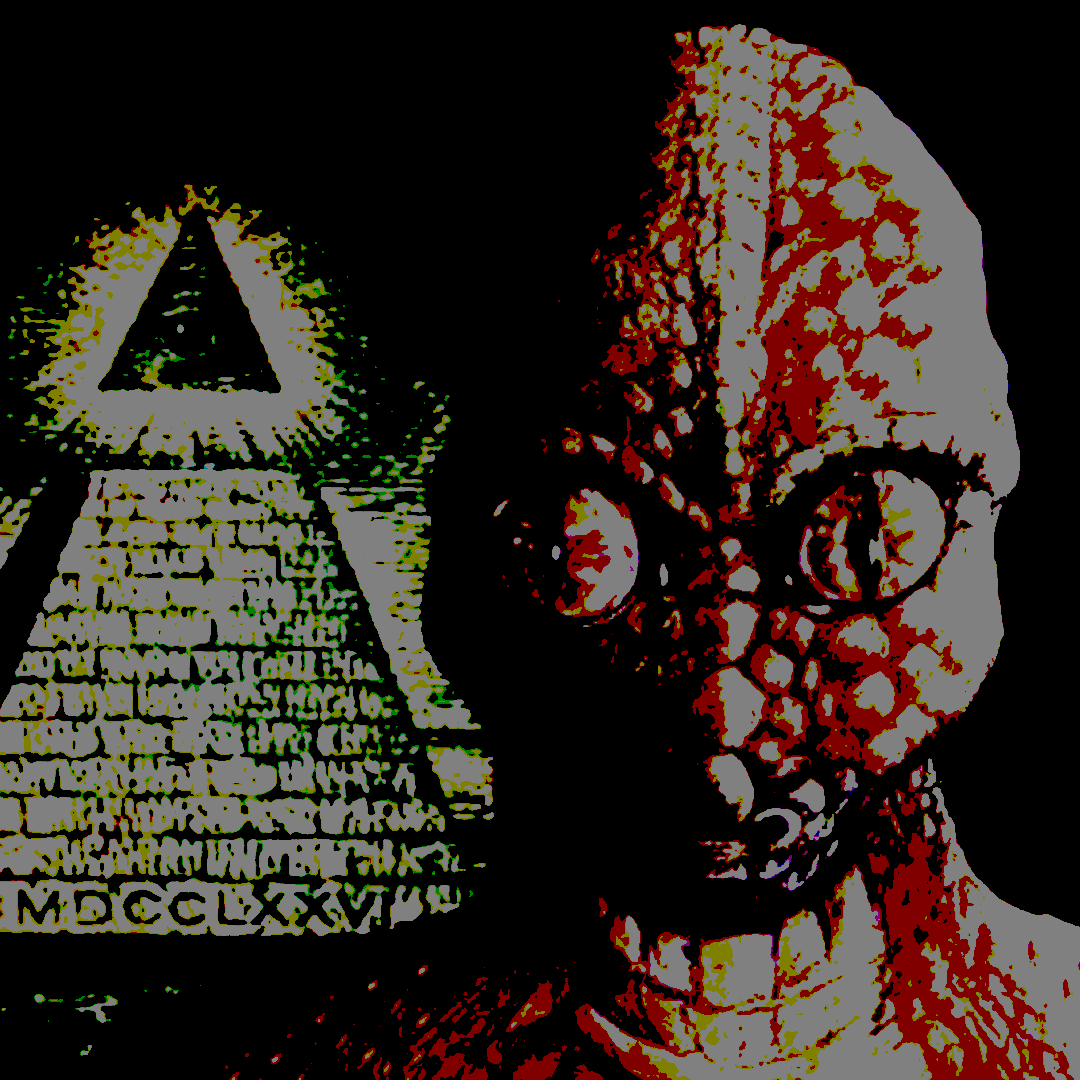

In [105]:
# hided = result << (8 - visibility) >> (8 - visibility)
# hided = (result - (result >> visibility << visibility)) << (8 - visibility)
hided = result << (8 - visibility)

Image.fromarray(hided)